# Домашняя работа к уроку 3

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import pylab
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fsolve

## Аналитическая геометрия

### Задание 1.

Даны два вектора в трехмерном пространстве: (10,10,10) и (0,0,-10)

Найдите их сумму. (на листочке)

Напишите код на Python, реализующий расчет длины вектора, заданного его координатами. (в программе)

In [2]:
a = np.array([10,10,10])

In [3]:
b = np.array([0,0,-10])

In [4]:
c = a + b

In [5]:
c

array([10, 10,  0])

In [6]:
def vector_length(value):
    return math.sqrt(value[0]**2 + value[1]**2 + value[2]**2)

In [7]:
vector_length(a)

17.320508075688775

In [8]:
vector_length(b)

10.0

In [9]:
vector_length(c)

14.142135623730951

### Задание 2.

Почему прямые не кажутся перпендикулярными? (см.ролик)

In [10]:
x = np.linspace(-5,5,21)

In [11]:
y = 3 * x + 1

In [12]:
y1 = (-1/3) * x + 1

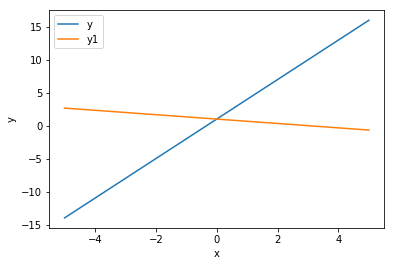

In [13]:
plt.plot(x,y)
plt.plot(x,y1)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(('y', 'y1'))

Отмасштабируем оси

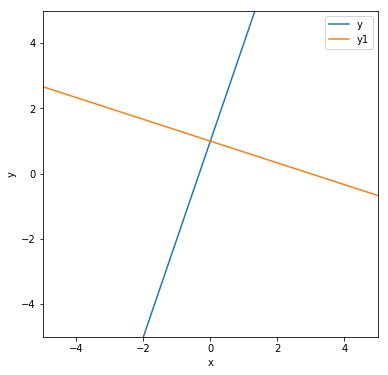

In [14]:
# Задали размер области рисования
plt.figure(figsize=(6,6))
plt.plot(x,y)
plt.plot(x,y1)
plt.xlabel("x")
plt.ylabel("y")
# Задаем масштаб осей.
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.legend(('y', 'y1'))

### Задание 3.

Напишите код на Python, реализующий построение графиков:
1. окружности,
2. эллипса,
3. гиперболы.

1. Уравнение окружности. Выразим у из уравнения окружности y = y0 + sqrt(R^2 - (x - x0)^2)

In [15]:
def circle(x, center, r, signum=1):
    # signum нужен для того, чтобы отрисовать график либо в нижней половине, 
    # либо в верхней половине относительно центра окружности.
    result = []
    for i in range(x.size):
        result.append(center[1] + (signum / math.fabs(signum)) * math.sqrt(r**2 - (x[i] - center[0])**2))
    return result

In [16]:
center = np.array([2,3])

In [17]:
r = 4

In [18]:
x = np.linspace(center[0] - r, center[0] + r, 100)

In [19]:
y1 = circle(x, center, r, 1)
y2 = circle(x, center, r, -1)

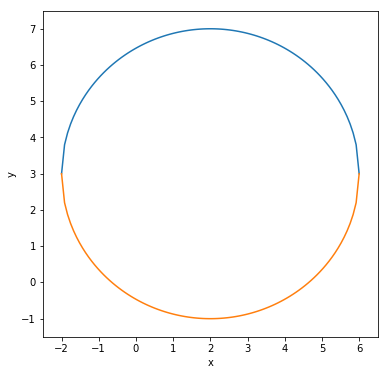

In [20]:
# Задали размер области рисования
plt.figure(figsize=(6,6))
plt.plot(x,y1)
plt.plot(x,y2)
plt.xlabel("x")
plt.ylabel("y")
# Задаем масштаб осей.
plt.xlim(-2.5, 6.5)
plt.ylim(-1.5,7.5)
plt.grid(False)

2. Уравнение элипса. Выразим у из уравнения элипса y = y0 + b * sqrt(1 - (x - x0)^2 / a^2)

In [21]:
def ellipse(x, a, b, center, signum=1):
    # signum нужен для того, чтобы отрисовать график либо в нижней половине, 
    # либо в верхней половине относительно центра окружности.
    result = []
    for i in range(x.size):
        result.append(center[1] + b * (signum / math.fabs(signum)) * math.sqrt(1 - ((x[i] - center[0]) / a)**2))
    return result

In [22]:
center = np.array([2,3])

In [23]:
a = 4

In [24]:
b = 2

In [25]:
x = np.linspace(center[0] - a, center[0] + a, 100)

In [26]:
y1 = ellipse(x, a, b, center, 1)
y2 = ellipse(x, a, b, center, -1)

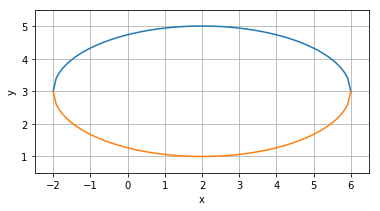

In [27]:
# Задали размер области рисования
plt.figure(figsize=(6,3))
plt.plot(x,y1)
plt.plot(x,y2)
plt.xlabel("x")
plt.ylabel("y")
# Задаем масштаб осей.
plt.xlim(-2.5, 6.5)
plt.ylim(0.5,5.5)
plt.grid(True)

3. Уравнение гиперболы. Выразим у из уравнения элипса y = y0 + b * sqrt(1(x - x0)^2 / a^2 - 1)

In [28]:
def hyperbole(x, a, b, center, signum=1):
    # signum нужен для того, чтобы отрисовать график либо в нижней половине, 
    # либо в верхней половине относительно центра окружности.
    result = []
    for i in range(x.size):
        if ((x[i] - center[0]) / a)**2 >= 1:
            result.append(center[1] + b * (signum / math.fabs(signum)) * math.sqrt(((x[i] - center[0]) / a)**2 - 1))
        else:
            result.append(None)
    return result

In [29]:
center = np.array([2,3])

In [30]:
a = 4

In [31]:
b = 2

In [32]:
x = np.linspace(center[0] - 10, center[0] + 10, 10000)

In [33]:
y1 = hyperbole(x, a, b, center, 1)
y2 = hyperbole(x, a, b, center, -1)

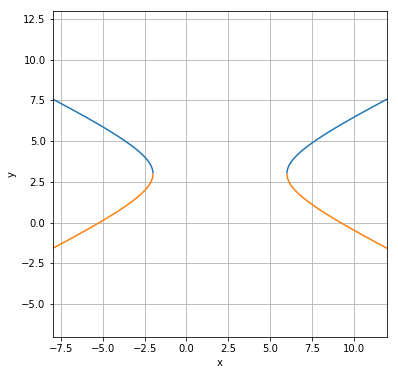

In [34]:
# Задали размер области рисования
plt.figure(figsize=(6,6))
plt.plot(x,y1)
plt.plot(x,y2)
plt.xlabel("x")
plt.ylabel("y")
# Задаем масштаб осей.
plt.xlim(center[0] - 10, center[0] + 10)
plt.ylim(center[1] - 10, center[1] + 10)
plt.grid(True)

### Задание 5.

1. Нарисуйте трехмерный график двух параллельных плоскостей.
2. Нарисуйте трехмерный график двух любых поверхностей второго порядка.

Выразим z из уравнения плоскости: z = -(A * x + B * y + D) / C

In [35]:
x = np.arange(-5, 5, 1)

In [36]:
y = np.arange(-5, 5, 1)

In [37]:
x, y = np.meshgrid(x, y)

In [38]:
A = 6

In [39]:
B = 2

In [40]:
C = 3

In [41]:
D1 = -10

In [42]:
D2 = 10

In [43]:
Z1 = -(A * x + B * y + D1) / C

In [44]:
Z2 = -(A * x + B * y + D2) / C

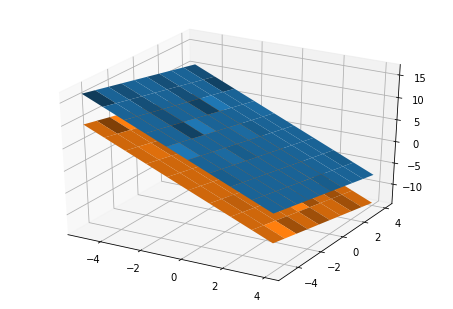

In [45]:
fig = pylab.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, Z1)
ax.plot_surface(x, y, Z2)
pylab.show()

1. Выразим z из уравнения элиптического параболоида: z = (x / a)^2 + (y / b)^2
2. Выразим z из уравнения гиперболического параболоида: z = (x / a)^2 - (y / b)^2

In [46]:
a = 0.1

In [47]:
b = 0.1

In [48]:
# Для наглядности поднимем кривую вверх
Z1 = (x / a)**2 + (y / b)**2 + 1200

In [49]:
# Для наглядности опустим кривую вниз
Z2 = (x / a)**2 - (y / b)**2 - 1200

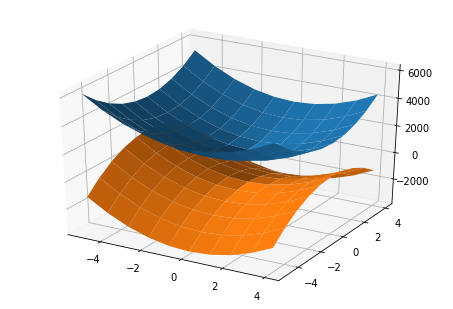

In [50]:
fig = pylab.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, Z1)
ax.plot_surface(x, y, Z2)
pylab.show()

## Графики на плоскости

### Задание 1.

Нарисуйте график функции:
y(x) = k∙cos(x – a) + b
для некоторых (2-3 различных) значений параметров k, a, b

In [51]:
def graph(x, k, a, b):
    result = []
    for i in range(x.size):
        result.append(k * math.cos(x[i] - a) + b)
    return result

In [52]:
x = np.arange(-5, 5, 0.1)

In [53]:
y1 = graph(x, 0.5, 2, -1)

In [54]:
y2 = graph(x, -0.5, -2, 1)

In [55]:
y3 = graph(x, 1, 3, 0)

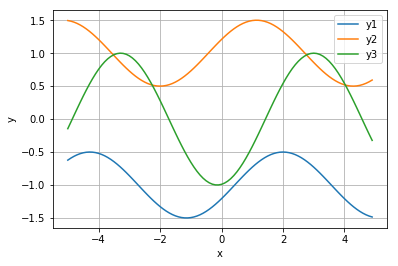

In [56]:
# Задали размер области рисования
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.xlabel("x")
plt.ylabel("y")
# Задаем масштаб осей.
# plt.xlim(center[0] - 10, center[0] + 10)
# plt.ylim(center[1] - 10, center[1] + 10)
plt.grid(True)
plt.legend(('y1', 'y2', 'y3'))

### Задание 3.

1. Напишите код, который будет переводить полярные координаты в декартовы.
2. Напишите код, который будет рисовать график окружности в полярных координатах.
3. Напишите код, который будет рисовать график отрезка прямой линии в полярных координатах.

1. Напишите код, который будет переводить полярные координаты в декартовы.

y=R·sin(α), x=R·cos(α)

In [57]:
alpha = np.linspace(0, 2 * math.pi, 100)

In [58]:
R = 5

In [59]:
x = R * np.cos(alpha)

In [60]:
y = R * np.sin(alpha)

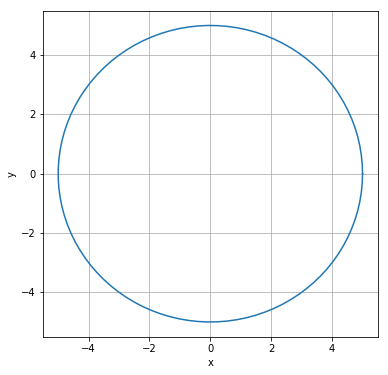

In [61]:
# Задали размер области рисования
plt.figure(figsize=(6,6))
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
# Задаем масштаб осей.
plt.xlim(-5.5, 5.5)
plt.ylim(-5.5, 5.5)
plt.grid(True)

2. Напишите код, который будет рисовать график окружности в полярных координатах.

In [62]:
alpha = np.linspace(0, 2 * math.pi, 100)

In [63]:
R = [5 for i in range(alpha.size)]

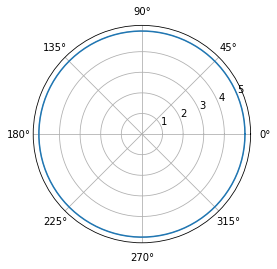

In [64]:
plt.polar(alpha, R)

3. Напишите код, который будет рисовать график отрезка прямой линии в полярных координатах.

In [65]:
R = np.linspace(0, 5, 100)

In [66]:
alpha = [5 for i in range(R.size)]

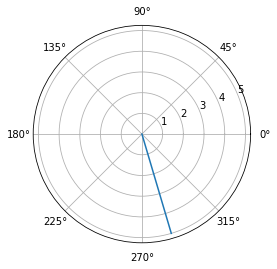

In [67]:
plt.polar(alpha, R)

### Задание 4.

1. Решите систему уравнений:

y = x² – 1

exp(x) + x∙(1 – y) = 1

In [68]:
x = np.linspace(-2, 3, 100)

In [69]:
y1 = x**2 - 1

In [70]:
y2 = (np.exp(x) - 1)/x + 1

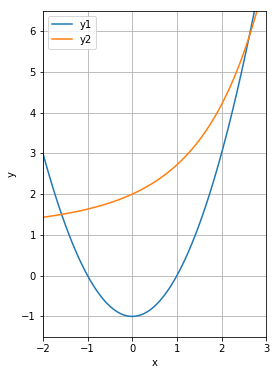

In [71]:
# Задали размер области рисования
plt.figure(figsize=(4,6))
plt.plot(x,y1)
plt.plot(x,y2)
plt.xlabel("x")
plt.ylabel("y")
# Задаем масштаб осей.
plt.xlim(-2, 3)
plt.ylim(-1.5, 6.5)
plt.grid(True)
plt.legend(('y1', 'y2'))

Из графика видно, что здесь два корня

Перенесем все части в одну сторону и приравняем некоторой функции

In [72]:
def systems(p):
    x, y = p
    return (x**2 - 1 - y, np.exp(x) + x - x * y - 1)

In [73]:
x1, y1 =  fsolve(systems, (-2, 1))
print (x1, y1)

-1.581835352893692 1.502203083670816


In [74]:
x2, y2 =  fsolve(systems, (2, 5))
print (x2, y2)

2.6181455730830665 5.854686241850252


2. Решите систему уравнений и неравенств:

y=x²–1

exp(x)+x∙(1–y)>1

Подставим первое уравнение во второе exp(x)+x∙(2–x²)-1>0

Определим новую функцию и найдем ее корни f=exp(x)+x∙(2–x²)-1

In [75]:
f = np.exp(x) + x * (2 - x**2) - 1

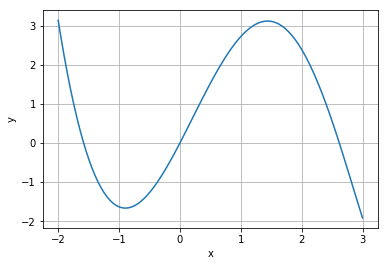

In [76]:
# Задали размер области рисования
plt.plot(x,f)
plt.xlabel("x")
plt.ylabel("y")
# Задаем масштаб осей.
plt.grid(True)

Из графика видно, что здесь три корня

In [77]:
def equation(x):
    return (np.exp(x) + x * (2 - x**2) - 1)

In [78]:
print (fsolve(equation, -2))

[-1.58183535]


In [79]:
print (fsolve(equation, 0))

[0.]


In [80]:
print (fsolve(equation, 2))

[2.61814557]
